In [1]:
# Import dependencies
%matplotlib inline
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pprint import pprint

In [2]:
df_rental_price = pd.read_csv('Zillow CSV Files/City_MedianRentalPrice_Sfr.csv')
df_rental_price.head()

,RegionName,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
0,New York,NY,New York-Newark-Jersey City,Queens County,1,NaN,NaN,NaN,NaN,NaN,...,2595.0,2550.0,2500.0,2500.0,2600.0,2595.0,2600.0,2600.0,2605.0,2625.0
1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,NaN,NaN,...,3750.0,3650.0,3697.5,3850.0,3850.0,3980.0,3950.0,3950.0,4000.0,4000.0
2,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,NaN,NaN,1542.5,1500.0,1450.0,...,1500.0,1500.0,1512.5,1573.0,1576.0,1600.0,1600.0,1600.0,1600.0,1594.5
3,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,4,NaN,NaN,NaN,NaN,NaN,...,1500.0,1500.0,1545.0,1580.0,1600.0,1600.0,1600.0,1600.0,1595.0,1575.0
4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,NaN,NaN,NaN,NaN,NaN,...,1250.0,1250.0,1250.0,1275.0,1295.0,1300.0,1300.0,1300.0,1295.0,1275.0


In [3]:
# Clean data
df_aus_rent_price = df_rental_price.loc[
    (df_rental_price["RegionName"] == "Austin") & 
    (df_rental_price["State"] == "TX"), :]
df_aus_rent_price

,RegionName,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
11,Austin,TX,Austin-Round Rock,Travis County,12,NaN,NaN,NaN,NaN,NaN,...,1650.0,1660.0,1695.0,1700.0,1725.0,1750.0,1775.0,1750.0,1750.0,1700.0


In [4]:
df_aus_rent_price = df_aus_rent_price.drop(
    labels=['RegionName',
            'State',
            'Metro',
            'CountyName',
            'SizeRank'],
    axis='columns'
)

In [5]:
df_aus_rent_price = df_aus_rent_price.loc[:,'2013-09'::3]
df_aus_rent_price

,2013-09,2013-12,2014-03,2014-06,2014-09,2014-12,2015-03,2015-06,2015-09,2015-12,...,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
11,1350.0,1295.0,1395.0,1350.0,1395.0,1335.0,1335.5,1527.0,1550.0,1500.0,...,1425.0,1375.0,1326.0,1630.0,1700.0,1695.0,1600.0,1695.0,1750.0,1750.0


In [6]:
df_aus_rent_price = df_aus_rent_price.transpose()
df_aus_rp_plot = df_aus_rent_price.reset_index()

df_aus_rp_plot.rename(
    index=str,
    columns={11:'Austin Median Rental Price',
             'index': 'Years'},
    inplace=True)


In [7]:
df_aus_rp_plot

,Years,Austin Median Rental Price
0,2013-09,1350.0
1,2013-12,1295.0
2,2014-03,1395.0
3,2014-06,1350.0
4,2014-09,1395.0
5,2014-12,1335.0
6,2015-03,1335.5
7,2015-06,1527.0
8,2015-09,1550.0
9,2015-12,1500.0


In [8]:
df_rental_price.head()

,RegionName,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
0,New York,NY,New York-Newark-Jersey City,Queens County,1,NaN,NaN,NaN,NaN,NaN,...,2595.0,2550.0,2500.0,2500.0,2600.0,2595.0,2600.0,2600.0,2605.0,2625.0
1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,NaN,NaN,...,3750.0,3650.0,3697.5,3850.0,3850.0,3980.0,3950.0,3950.0,4000.0,4000.0
2,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,NaN,NaN,1542.5,1500.0,1450.0,...,1500.0,1500.0,1512.5,1573.0,1576.0,1600.0,1600.0,1600.0,1600.0,1594.5
3,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,4,NaN,NaN,NaN,NaN,NaN,...,1500.0,1500.0,1545.0,1580.0,1600.0,1600.0,1600.0,1600.0,1595.0,1575.0
4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,NaN,NaN,NaN,NaN,NaN,...,1250.0,1250.0,1250.0,1275.0,1295.0,1300.0,1300.0,1300.0,1295.0,1275.0


In [9]:
df_natl_rent_price = df_rental_price.drop(
    labels=['RegionName', 
            'State', 
            'Metro', 
            'CountyName', 
            'SizeRank'], 
    axis='columns'
)
df_natl_rent_price.head()

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2595.0,2550.0,2500.0,2500.0,2600.0,2595.0,2600.0,2600.0,2605.0,2625.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3750.0,3650.0,3697.5,3850.0,3850.0,3980.0,3950.0,3950.0,4000.0,4000.0
2,NaN,NaN,1542.5,1500.0,1450.0,1575.0,1600.0,1500.0,1650.0,1700.0,...,1500.0,1500.0,1512.5,1573.0,1576.0,1600.0,1600.0,1600.0,1600.0,1594.5
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1500.0,1500.0,1545.0,1580.0,1600.0,1600.0,1600.0,1600.0,1595.0,1575.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1250.0,1250.0,1250.0,1275.0,1295.0,1300.0,1300.0,1300.0,1295.0,1275.0


In [10]:
df_natl_rent_price = df_natl_rent_price.loc[:, '2013-09'::3]
df_natl_rent_price.head()

,2013-09,2013-12,2014-03,2014-06,2014-09,2014-12,2015-03,2015-06,2015-09,2015-12,...,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
0,2669.0,2575.0,2500.0,2500.0,2592.0,2430.0,2600.0,2700.0,2695.0,2675.0,...,2747.0,2800.0,2695.0,2617.5,2675.0,2675.0,2600.0,2500.0,2595.0,2605.0
1,NaN,NaN,2650.0,3100.0,3200.0,3215.0,3300.0,3800.0,3750.0,3500.0,...,3900.0,3900.0,3600.0,3923.0,4000.0,3995.0,3900.0,3697.5,3980.0,4000.0
2,1550.0,1600.0,1542.5,1605.0,1685.0,1660.0,1618.0,1602.0,1626.0,1553.0,...,1547.0,1551.5,1557.0,1500.0,1535.5,1550.0,1516.5,1512.5,1600.0,1600.0
3,NaN,1200.0,1300.0,1400.0,1450.0,1450.0,1500.0,1600.0,1550.0,1595.0,...,1500.0,1495.0,1400.0,1505.0,1595.0,1595.0,1500.0,1545.0,1600.0,1595.0
4,1087.5,1095.0,1100.0,1150.0,1137.5,1100.0,1146.0,1150.0,1100.0,1125.0,...,1099.0,1074.0,1037.0,1200.0,1295.0,1250.0,1237.0,1250.0,1300.0,1295.0


In [11]:
df_natl_rp_avg = pd.DataFrame(df_natl_rent_price.mean())
df_natl_rp_avg

,0
2013-09,1496.732394
2013-12,1489.913344
2014-03,1474.245522
2014-06,1554.912409
2014-09,1555.290580
2014-12,1545.311874
2015-03,1575.335938
2015-06,1641.657601
2015-09,1665.887895
2015-12,1662.361644


In [12]:
df_natl_rp_plot = df_natl_rp_avg.reset_index()

df_natl_rp_plot.rename(
    index=str,
    columns={0:'National Median Rental Price',
             'index': 'Years'},
    inplace=True)

In [13]:
df_natl_rp_plot

,Years,National Median Rental Price
0,2013-09,1496.732394
1,2013-12,1489.913344
2,2014-03,1474.245522
3,2014-06,1554.912409
4,2014-09,1555.290580
5,2014-12,1545.311874
6,2015-03,1575.335938
7,2015-06,1641.657601
8,2015-09,1665.887895
9,2015-12,1662.361644


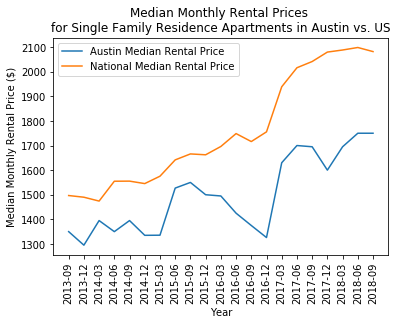

In [14]:
x_axis = np.arange(0, len(df_aus_rp_plot['Years']))
tick_loc = []
for x in x_axis:
    tick_loc.append(x)


plt.xticks(tick_loc, df_aus_rp_plot['Years'], rotation=90)    
    
plt.plot(x_axis, df_aus_rp_plot['Austin Median Rental Price'])
plt.plot(x_axis, df_natl_rp_plot['National Median Rental Price'])


plt.xlabel('Year')
plt.ylabel('Median Monthly Rental Price ($)')
plt.title('Median Monthly Rental Prices \n'
            'for Single Family Residence Apartments in Austin vs. US')


plt.legend(loc='best')

plt.savefig('Rental Plots/MedianMonthlyRentalPricesSFR_Aus_v_US.png', bbox_inches='tight')


In [15]:
plt.show()

In [16]:
df_zri_rental_price = pd.read_csv('Zillow CSV Files/City_Zri_SingleFamilyResidenceRental.csv')
df_zri_rental_price.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2010-11,2010-12,2011-01,2011-02,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
0,6181,New York,NY,New York-Newark-Jersey City,Queens County,1,1751.0,1760.0,1773.0,1784.0,...,2301,2292,2283,2272,2262,2255,2251,2249,2248,2255
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,2310.0,2313.0,2307.0,2307.0,...,3012,3015,3020,3024,3026,3026,3023,3019,3016,3025
2,17426,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,1500.0,1500.0,1489.0,1472.0,...,1593,1587,1579,1574,1568,1563,1560,1559,1559,1564
3,39051,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,4,1260.0,1245.0,1235.0,1229.0,...,1472,1468,1466,1465,1463,1461,1459,1457,1454,1457
4,6915,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,1074.0,1054.0,1041.0,1031.0,...,1288,1286,1285,1285,1285,1285,1285,1286,1285,1288


In [17]:
df_aus_zri_rp = df_zri_rental_price.loc[
    (df_zri_rental_price["RegionName"] == "Austin") & 
    (df_zri_rental_price["State"] == "TX"), :]
df_aus_zri_rp

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2010-11,2010-12,2011-01,2011-02,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
11,10221,Austin,TX,Austin-Round Rock,Travis County,12,1352.0,1356.0,1361.0,1370.0,...,1839,1831,1830,1832,1832,1831,1831,1832,1833,1836


In [18]:
df_aus_zri_rp = df_aus_zri_rp.loc[:,'2013-09'::3]
df_aus_zri_rp

,2013-09,2013-12,2014-03,2014-06,2014-09,2014-12,2015-03,2015-06,2015-09,2015-12,...,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
11,1652.0,1647.0,1657.0,1672.0,1735.0,1769.0,1785.0,1815.0,1875.0,1862.0,...,1909,1932,1887,1862,1886,1906,1857,1830,1831,1833


In [19]:
df_aus_zri_rp = df_aus_zri_rp.transpose()
df_aus_zri_rp_plot = df_aus_zri_rp.reset_index()

df_aus_zri_rp_plot.rename(
    index=str,
    columns={11:'Austin Zillow Rental Index',
             'index': 'Years'},
    inplace=True)

df_aus_zri_rp_plot

,Years,Austin Zillow Rental Index
0,2013-09,1652.0
1,2013-12,1647.0
2,2014-03,1657.0
3,2014-06,1672.0
4,2014-09,1735.0
5,2014-12,1769.0
6,2015-03,1785.0
7,2015-06,1815.0
8,2015-09,1875.0
9,2015-12,1862.0


In [20]:
df_zri_rental_price.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2010-11,2010-12,2011-01,2011-02,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
0,6181,New York,NY,New York-Newark-Jersey City,Queens County,1,1751.0,1760.0,1773.0,1784.0,...,2301,2292,2283,2272,2262,2255,2251,2249,2248,2255
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,2310.0,2313.0,2307.0,2307.0,...,3012,3015,3020,3024,3026,3026,3023,3019,3016,3025
2,17426,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,1500.0,1500.0,1489.0,1472.0,...,1593,1587,1579,1574,1568,1563,1560,1559,1559,1564
3,39051,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,4,1260.0,1245.0,1235.0,1229.0,...,1472,1468,1466,1465,1463,1461,1459,1457,1454,1457
4,6915,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,1074.0,1054.0,1041.0,1031.0,...,1288,1286,1285,1285,1285,1285,1285,1286,1285,1288


In [21]:
df_natl_zri_rp = df_zri_rental_price.loc[:,'2013-09'::3]
df_natl_zri_rp.head()

,2013-09,2013-12,2014-03,2014-06,2014-09,2014-12,2015-03,2015-06,2015-09,2015-12,...,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
0,1965.0,1987.0,2004.0,2005.0,2116.0,2152.0,2140.0,2155.0,2189.0,2226.0,...,2235,2293,2311,2298,2289,2343,2315,2283,2255,2248
1,2391.0,2413.0,2411.0,2401.0,2469.0,2546.0,2596.0,2636.0,2696.0,2731.0,...,2831,2889,2920,2928,2956,2996,3009,3020,3026,3016
2,1427.0,1456.0,1466.0,1442.0,1489.0,1518.0,1488.0,1490.0,1537.0,1541.0,...,1549,1584,1573,1543,1576,1614,1602,1579,1563,1559
3,1302.0,1315.0,1305.0,1320.0,1365.0,1389.0,1407.0,1434.0,1470.0,1463.0,...,1477,1479,1462,1445,1444,1465,1473,1466,1461,1454
4,1115.0,1129.0,1126.0,1143.0,1176.0,1176.0,1185.0,1219.0,1250.0,1238.0,...,1246,1250,1249,1249,1260,1290,1290,1285,1285,1285


In [22]:
df_natl_zri_rp_avg = pd.DataFrame(df_natl_zri_rp.mean())
df_natl_zri_rp_avg

,0
2013-09,1394.150743
2013-12,1393.983636
2014-03,1377.185356
2014-06,1378.587663
2014-09,1420.456828
2014-12,1432.738934
2015-03,1434.014403
2015-06,1466.388885
2015-09,1497.574725
2015-12,1478.943226


In [23]:
df_natl_zri_rp_plot = df_natl_zri_rp_avg.reset_index()

df_natl_zri_rp_plot.rename(
    index=str,
    columns={0:'National Zillow Rental Index',
             'index': 'Years'},
    inplace=True)
df_natl_zri_rp_plot

,Years,National Zillow Rental Index
0,2013-09,1394.150743
1,2013-12,1393.983636
2,2014-03,1377.185356
3,2014-06,1378.587663
4,2014-09,1420.456828
5,2014-12,1432.738934
6,2015-03,1434.014403
7,2015-06,1466.388885
8,2015-09,1497.574725
9,2015-12,1478.943226


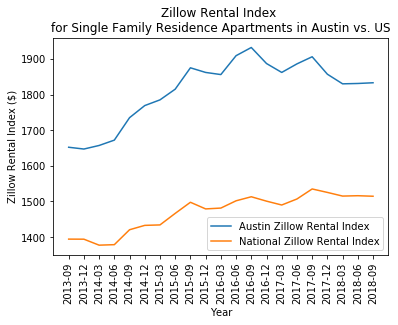

In [24]:
x_axis = np.arange(0, len(df_aus_zri_rp_plot['Years']))
tick_loc = []
for x in x_axis:
    tick_loc.append(x)


plt.xticks(tick_loc, df_aus_zri_rp_plot['Years'], rotation=90)    
    
plt.plot(x_axis, df_aus_zri_rp_plot['Austin Zillow Rental Index'])
plt.plot(x_axis, df_natl_zri_rp_plot['National Zillow Rental Index'])


plt.xlabel('Year')
plt.ylabel('Zillow Rental Index ($)')
plt.title('Zillow Rental Index \n'
            'for Single Family Residence Apartments in Austin vs. US')


plt.legend(loc='best')
plt.savefig('Rental Plots/ZRI_SFR_Aus_v_US.png', bbox_inches='tight')


In [25]:
plt.show()

In [26]:
df_st_md_rp = pd.read_csv('Zillow CSV Files/State_MedianRentalPrice_Sfr.csv')
df_st_md_rp.head()

,RegionName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
0,California,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2675.0,2700.0,2700,2750.0,2800.0,2800.0,2814.5,2800,2800.0,2795
1,Texas,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1500.0,1500.0,1500,1550.0,1575.0,1595.0,1595.0,1590,1550.0,1550
2,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3500.0,3800.0,3595,3800.0,4000.0,3700.0,3663.0,3400,3300.0,3265
3,Florida,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1750.0,1790.0,1795,1800.0,1800.0,1800.0,1800.0,1800,1800.0,1795
4,Illinois,5,NaN,1635.0,1600.0,1600.0,1600.0,1650.0,1650.0,1600.0,...,1475.0,1500.0,1500,1525.0,1550.0,1595.0,1600.0,1575,1550.0,1545


In [27]:
df_tx_md_rp = df_st_md_rp.loc[
    (df_st_md_rp["RegionName"] == "Texas"), :]
df_tx_md_rp = df_tx_md_rp.loc[:, '2013-09'::3]
df_tx_md_rp

,2013-09,2013-12,2014-03,2014-06,2014-09,2014-12,2015-03,2015-06,2015-09,2015-12,...,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
1,1275.0,1259.5,1290.0,1375.0,1375.0,1375.0,1400.0,1495.0,1425.0,1425.0,...,1450.0,1400.0,1395.0,1495.0,1550.0,1525.0,1500.0,1500,1595.0,1550.0


In [28]:
df_tx_md_rp = df_tx_md_rp.transpose()
df_tx_md_rp_plot = df_tx_md_rp.reset_index()

df_tx_md_rp_plot.rename(
    index=str,
    columns={1:'Texas Median Rental Price',
             'index': 'Years'},
    inplace=True)

df_tx_md_rp_plot

,Years,Texas Median Rental Price
0,2013-09,1275.0
1,2013-12,1259.5
2,2014-03,1290.0
3,2014-06,1375.0
4,2014-09,1375.0
5,2014-12,1375.0
6,2015-03,1400.0
7,2015-06,1495.0
8,2015-09,1425.0
9,2015-12,1425.0


In [29]:
df_st_md_rp.head()

,RegionName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
0,California,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2675.0,2700.0,2700,2750.0,2800.0,2800.0,2814.5,2800,2800.0,2795
1,Texas,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1500.0,1500.0,1500,1550.0,1575.0,1595.0,1595.0,1590,1550.0,1550
2,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3500.0,3800.0,3595,3800.0,4000.0,3700.0,3663.0,3400,3300.0,3265
3,Florida,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1750.0,1790.0,1795,1800.0,1800.0,1800.0,1800.0,1800,1800.0,1795
4,Illinois,5,NaN,1635.0,1600.0,1600.0,1600.0,1650.0,1650.0,1600.0,...,1475.0,1500.0,1500,1525.0,1550.0,1595.0,1600.0,1575,1550.0,1545


In [30]:
df_natl_md_rp = df_st_md_rp.loc[:,'2013-09'::3]
df_natl_md_rp.dropna(inplace=True)
df_natl_md_rp.head()

,2013-09,2013-12,2014-03,2014-06,2014-09,2014-12,2015-03,2015-06,2015-09,2015-12,...,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09
0,1850.0,1895.0,1800.0,2000.0,2000.0,2000.0,2100.0,2250.0,2295.0,2300.0,...,2400.0,2395.0,2300.0,2500.0,2700.0,2700.0,2650.0,2700,2800.0,2800.0
1,1275.0,1259.5,1290.0,1375.0,1375.0,1375.0,1400.0,1495.0,1425.0,1425.0,...,1450.0,1400.0,1395.0,1495.0,1550.0,1525.0,1500.0,1500,1595.0,1550.0
3,1595.0,1625.0,1500.0,1600.0,1600.0,1525.0,1575.0,1600.0,1600.0,1619.0,...,1650.0,1600.0,1595.0,1675.0,1749.0,1750.0,1750.0,1795,1800.0,1800.0
4,1500.0,1525.0,1500.0,1575.0,1595.0,1519.0,1550.0,1595.0,1575.0,1530.0,...,1550.0,1500.0,1500.0,1495.0,1550.0,1500.0,1495.0,1500,1595.0,1550.0
5,1250.0,1200.0,1200.0,1350.0,1295.0,1250.0,1300.0,1385.0,1300.0,1250.0,...,1300.0,1275.0,1250.0,1300.0,1350.0,1275.0,1275.0,1300,1350.0,1300.0


In [31]:
df_natl_md_rp = df_natl_md_rp.mean()
df_natl_md_rp = df_natl_md_rp.transpose()
df_natl_md_rp_plot = df_natl_md_rp.reset_index()

df_natl_md_rp_plot.rename(
    index=str,
    columns={0:'National Median Rental Price',
             'index': 'Years'},
    inplace=True)

df_natl_md_rp_plot

,Years,National Median Rental Price
0,2013-09,1327.695652
1,2013-12,1309.608696
2,2014-03,1266.989130
3,2014-06,1370.760870
4,2014-09,1357.532609
5,2014-12,1341.913043
6,2015-03,1385.597826
7,2015-06,1432.130435
8,2015-09,1407.217391
9,2015-12,1390.869565


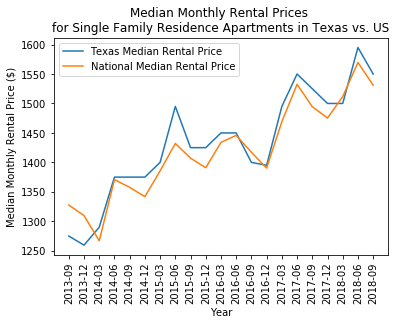

In [32]:
x_axis = np.arange(0, len(df_tx_md_rp_plot['Years']))
tick_loc = []
for x in x_axis:
    tick_loc.append(x)


plt.xticks(tick_loc, df_tx_md_rp_plot['Years'], rotation=90)    
    
plt.plot(x_axis, df_tx_md_rp_plot['Texas Median Rental Price'])
plt.plot(x_axis, df_natl_md_rp_plot['National Median Rental Price'])


plt.xlabel('Year')
plt.ylabel('Median Monthly Rental Price ($)')
plt.title('Median Monthly Rental Prices \n'
            'for Single Family Residence Apartments in Texas vs. US')


plt.legend(loc='best')
plt.savefig('Rental Plots/MedianMonthlyRentalPrices_SFR_TX_v_US.png', bbox_inches='tight')


In [33]:
plt.show()